In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

q1_part(a)

In [98]:
houses = pd.read_csv("C:/Users/acer/Desktop/ML_Hw1/house_prices.csv")
print(houses)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     parking   price  
0          2  791000  
1          3  919000  
2          2  994000  
3          3  81100

In [99]:
X = houses.drop(columns=['price']).to_numpy()
Y = houses['price'].to_numpy().reshape(-1, 1)

X.shape, Y.shape

((545, 8), (545, 1))

In [100]:
def zscore_normalize_features(X):
    
    # find the mean of each column/feature
    mu = np.mean(X, axis=0) 
    
    # find the standard deviation of each column/feature
    sigma = np.std(X, axis=0) 
    
    #subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return X_norm

In [101]:
def min_max_norm(X , Y):
    X_norm = (X - X.min()) / (X.max() - X.min())
    #y_norm = (Y - Y.min()) / (Y.max() - Y.min())
    return X_norm

In [102]:
# normalize the original features
#X_norm = zscore_normalize_features(X)
#X_norm

In [103]:
X_norm = min_max_norm(X , Y)


In [104]:
X_bias = np.ones((X.shape[0],1))
Xnew = np.hstack((X_norm,X_bias))
Xnew

array([[4.58024691e-01, 2.46913580e-04, 1.23456790e-04, ...,
        0.00000000e+00, 1.23456790e-04, 1.00000000e+00],
       [5.53086420e-01, 2.46913580e-04, 2.46913580e-04, ...,
        0.00000000e+00, 1.85185185e-04, 1.00000000e+00],
       [6.14814815e-01, 1.85185185e-04, 1.23456790e-04, ...,
        6.17283951e-05, 1.23456790e-04, 1.00000000e+00],
       ...,
       [2.23456790e-01, 1.23456790e-04, 6.17283951e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.79629630e-01, 1.85185185e-04, 6.17283951e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.37654321e-01, 1.85185185e-04, 6.17283951e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

q1_part(b)

In [105]:
def calculate_cost_func(X , Y , w):
    
    f_model = np.dot(X, w)
    cost = np.sum((f_model-Y)**2)
    
    final_cost = cost/(2*Y.shape[0])
    
    return final_cost  

In [106]:
def calculate_gradiant(X , Y , w):
    new_dw=np.zeros([X.shape[1], 1])
    #print(new_dw)
    
    for j in range(Y.shape[0]):
        error = np.dot(X[j] , w) - Y[j]
        for i in range(X.shape[1]):
            new_dw[i] = new_dw[i] + error * X[j,i]
            #print(new_dw[i])
    #print(new_dw)  
    new_dw = new_dw/Y.shape[0]
    #print(new_dw)
    #print(new_db.shape)
    return new_dw

In [107]:
def batch_gradiant(X , Y , w , alpha , iteration):
    cost_history=[]
    
    for i in range(iteration):
        new_dw = calculate_gradiant(X , Y , w)
    #print(new_dw)
    #print(new_db)
        w = w - (alpha * new_dw)
    #print(w.shape) 
        cost = calculate_cost_func(X , Y , w)
        cost_history.append(cost)
    return cost_history , w

In [108]:
w=np.ones([Xnew.shape[1], 1])
cost_list , w = batch_gradiant(Xnew , Y , w , 0.001, 100)
updated_w = w
print(cost_list)

[197789171445.51254, 197374620677.4563, 196960983013.7285, 196548256441.60724, 196136438952.80753, 195725528543.47104, 195315523214.15662, 194906420969.8304, 194498219819.85623, 194090917777.98572, 193684512862.3489, 193279003095.44434, 192874386504.12955, 192470661119.61154, 192067824977.437, 191665876117.48285, 191264812583.94672, 190864632425.3373, 190465333694.4651, 190066914448.43256, 189669372748.6251, 189272706660.70114, 188876914254.5831, 188481993604.4477, 188087942788.71698, 187694759890.04846, 187302442995.32608, 186910990195.6509, 186520399586.33167, 186130669266.8757, 185741797340.97946, 185353781916.51944, 184966621105.54294, 184580313024.25876, 184194855793.0283, 183810247536.356, 183426486382.88055, 183043570465.3657, 182661497920.691, 182280266889.84296, 181899875517.90573, 181520321954.0525, 181141604351.53595, 180763720867.67966, 180386669663.869, 180010448905.54196, 179635056762.18085, 179260491407.30252, 178886751018.4502, 178513833777.18423, 178141737869.07333, 17

In [109]:
MyModel_MSE = calculate_cost_func(Xnew , Y , updated_w)
print(MyModel_MSE)

160878446204.26193


Text(0, 0.5, 'Cost')

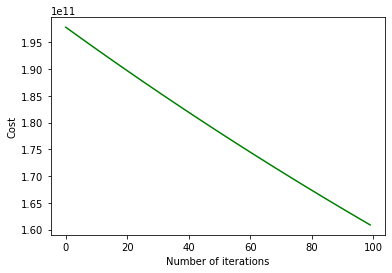

In [14]:
plt.plot(range(100), cost_list, c='green')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

q1_partc

In [15]:
X_test = np.array([7700, 3, 2, 1, 1, 0, 0, 2, 1])
#X_test_norm = zscore_normalize_features(X_test)
#n12 = np.squeeze(np.asarray(X_test_norm))
#print(n12)
f_model = np.dot(X_test , updated_w) 
print(f_model)

[1.57637286e+08]


q1_part_D

In [78]:
def calculate_SGD(X , Y , w , alpha , iteration):
    cost_history=[0] * iteration
    #cost_history=[]
    for i in range(iteration):
        for j in range(Y.shape[0]):
            index = np.random.randint(Y.shape[0])
            Yj= Y[index:index+1]
            Xj= X[index:index+1]
            
            f_model = np.dot(Xj, w)
            w = w - alpha * 2 * Xj.T.dot(f_model-Yj)
            #cost = calculate_cost_func(Xj , Yj , w)
            #cost_history.append(cost)
            cost_history[i] = calculate_cost_func(Xj , Yj , w)
            
    return cost_history , w

In [17]:
w=np.ones([Xnew.shape[1], 1])
SGD_cost_list , w = calculate_SGD(Xnew , Y , w , 0.001 , 100)

122983353023.18227
72275229533.80235
260943574158.6245
177145021877.28818
171665848843.27615
447358736700.538
227736794795.89133
106018378657.77155
309466506626.80255
245224436403.71884
192360883279.26523
376813677239.773
119541993316.06805
173921019750.5785
237220169038.70648
115178837188.90373
139683440923.0541
287622703193.2706
132589865569.09058
93997820176.75989
543769048910.89343
108881170077.71114
110867870522.62915
209733592841.70514
94051625682.2618
273255633576.79773
107484471670.37143
108439848773.96893
112205646994.31992
134328626471.11935
157661483976.36142
150977851847.9098
57752632195.617775
562022572621.7147
424222007812.1806
354859273282.858
75314060239.24538
178655109026.741
154549322380.00897
384470946171.2742
312096714158.14343
265488700566.45074
124640769478.40196
151798142727.01553
174122590209.12637
177899561180.7261
130441245422.18271
81615197514.41989
75896391920.00053
50297741284.93797
105689392492.84157
82122684476.33679
386591924676.74316
49347261835.06427
8

39708058734.45334
20881684978.446682
6582803741.173643
14676499843.422283
226785351.00831097
1176121344.0647306
8099652119.015102
4870574028.744024
4449692657.842673
3051717907.6237984
4497600352.605817
4741560665.193598
8945373667.430971
56786085.846028134
578261937.644241
2038440237.8709722
3234073249.819461
2823873751.08593
2973930188.71714
12371011585.228155
14427405579.283056
8102345250.084184
2845116977.752963
10521789.038985394
10537557570.031275
6337373812.708286
152074697.81857947
3636421923.2492104
10455855421.302704
3020208244.0643997
15991399016.792917
3670322307.7817717
2063849692.8828852
806237882.5587251
11014230914.92834
6669278272.380718
7808619017.0947075
60648927.641894534
1616379.297518037
3615306593.391355
2963812942.2406473
12480032339.382338
8070599856.957432
418114901.40001345
20570257452.34348
2829873492.698007
2038718057.7905276
16252689986.520298
9227276872.967892
1907414118.7213535
3754324537.4268036
42674128187.839645
1838352762.2710834
71455427.71429606
83

9406182279.605278
69859352.20700228
795628892.5635356
5335198450.4990015
4593483828.832559
12415541462.414154
4085011689.090718
4939532222.395004
2221969288.2053213
858891346.126145
7371693469.174138
899165350.8498477
18398649620.62108
148938076.16749665
13573956994.321228
2757370862.6704617
1502218653.291186
5740986890.275717
1292622535.0664277
1154236541.6383972
4357615977.034849
3204887421.2974534
11372853691.060972
7364759301.859008
96465445.24393092
3044053224.366127
18211362970.04069
5941136916.66293
2195730905.191145
1060194227.6104599
61447479550.88435
18382719041.54505
800030737.0001346
5907581274.082755
4609082660.652753
11800975347.053877
5101185798.434496
1437808735.8127196
821514780.1481094
5564051609.522861
494930831.9884031
9932900.950048214
5409165666.471119
2816565326.1898537
2133798.592552951
14244421879.695204
19647803.34740459
1208031149.4590251
4648027350.374318
2713328824.4452434
4074651060.768089
204731409.0598639
16354480407.915924
2292614101.5871034
5433843537.

2356830839.4229493
16627150303.318842
4405227125.461517
1170815032.1329203
3383753672.214064
8427447226.82125
3475727015.799827
283139900.48406726
4629827514.606863
29557905833.170116
48786449.8168622
1045110036.1149071
7497242244.206507
4222913535.3962407
19237374823.135357
8292986432.139968
14781996804.349714
7509567287.465977
5423594299.099461
3524688109.513651
1221423356.3171134
12085931086.68268
474165070.4785756
5103354840.401033
1667956.1845076077
1920805563.0083964
4691730.568532718
5050106978.489256
245604097.99219728
1941518950.6179955
5088597826.443971
6413876.135733992
815916316.616349
917134866.257104
3023280537.340292
25716131.900141925
5633098451.565331
8221506935.4958935
9053956741.454681
3573033407.3311787
440002143.45635265
3518859.135944249
5217971161.386072
159787018.40278113
1787491797.4612656
829273829.8903282
9306816159.86064
6959004120.881228
6340539773.423493
3144915716.418556
14448274723.35569
448274158.5596241
1212846781.5621283
364163512.90514547
4434349860.

1611664401.5124419
660765836.28448
9776656.58927738
8952590183.64556
143296762.36896858
8828468757.135086
11608944.654343953
1295786148.6049652
5682699111.248073
3331924567.5666533
3365320218.089601
5291995473.7453575
208008.1476519432
945238401.8088263
979908487.1469979
1092013004.0250325
19494783.722069092
345476580.72984153
2947352938.16197
1294683130.990156
1080920250.7599409
903883413.3410674
4629988331.303967
11053008735.61739
3833069108.713687
5052508091.717869
2337225351.571376
117327505.85817643
160662149.9834433
757497798.7345405
7273538037.160986
47274228087.37022
3030722876.9822316
8394511050.439688
5164898756.29148
3055265956.8562365
8902524052.684202
1552343725.7060864
140689672.2262869
2694466600.335121
164867042.39836887
4785014538.099451
13751194726.08331
5584306605.769706
576460851.2297037
6166701021.884086
36673194.120316826
1201526021.793641
1067318102.1945323
141276461.2374579
8468042990.367219
1486872426.146126
2590785450.923398
8912473840.537586
1365798053.740619

162073389.68822938
1138194995.8343194
7658118239.681033
37362949162.59943
388569367.4750501
1389646092.8450868
4917474470.530264
6281126220.921373
8488857262.744349
3526100163.8181915
79456761.20174943
110440379.27813241
2244096690.685604
5097366.508074831
2907755487.118822
1327766609.49002
6643234749.8647585
4593915852.962483
3571417051.6787443
137433080.1302
2705352163.8381934
3496095354.925435
8718143779.728594
696897194.2933326
4390445194.435454
4484093343.214107
1218180588.159709
1885610360.059434
3301145269.032938
4599395082.447929
5805610459.323638
124131040.72993141
7827317719.843791
7638591440.7333
3468225976.868738
1626644789.080768
7600772247.761939
9755523103.253002
189342492.17258075
3733167290.639163
2984317302.437757
688390097.7673045
745060667.3582945
4794461247.393814
428124429.90339816
448901012.35158753
4470408400.607717
8251004039.821612
7207845324.147649
2293345040.380897
17307239488.213566
2221292226.092235
1753705.899088555
6024902635.2128525
5600737751.844134
26

3115164212.663173
1293052197.5649498
2612607017.8544273
10308894078.707405
2832024634.7337537
13585945648.320898
3934816515.874085
3760771414.159201
107771195.02207698
696763345.4077437
5256123241.50636
6878609568.937545
2638287105.9169617
1608528.1835205557
3745690040.494229
2633383194.5424294
915558845.6329849
1846378265.5513291
6791242337.055481
2898280284.7498355
210633479.67587757
717058466.7771786
2518922840.3638215
1553698344.4287322
3520476586.866507
7934259.076892863
3601299108.3816023
6021084633.578201
4312349418.582437
707918634.9457821
1081075047.0600672
3776178952.451329
788583405.848599
297859976.7233828
9992290607.859037
226684136.89239526
11144688774.580954
273160016.62252
1943679741.007126
41493011881.52546
1704499106.1092591
3120064174.5394177
7606126166.900752
420275688.49199635
34083172299.09064
843379330.7814367
984817768.1293782
5974736259.38849
517120873.88098794
975491818.4267166
4287039946.3480177
2749739190.0621853
9317818044.836424
909940033.7565926
429152375

1908302628.2855186
937025066.0296512
306406809.5636243
2974766998.7398286
2581182578.5821047
38481711.136774525
68422363300.51105
6320324122.591033
6223393400.010056
4874454495.541424
3570233228.8560295
88463552.60090226
2542394986.480916
9193328109.112951
45753776.18255398
2368746712.489516
33685217382.269276
3332807263.0504446
1270254733.5926502
907087079.2250428
1984398445.2167597
5445314275.907809
2810619600.556197
572147438.809017
5473131880.31102
310649944.62275445
3185859431.075193
15508899.884844987
1322962611.231429
903451366.1359187
247789524.81854686
809685580.6336504
3012632361.6307907
424743916.7395227
2956554152.91668
277638885.3354124
591857101.0252682
367754530.9123919
299203735.4834109
99442380.05591397
937381421.1821754
5550479014.5261135
4680876848.108887
6660949443.956994
9695910308.519537
392399503.67883694
13744397091.802702
7296618594.958754
294381031.25768363
4805014440.346877
1217042227.0847597
2412754329.0626144
2239477785.4492154
4915659696.157092
482783943.6

114921923.86337769
82167796.87617451
4550450655.597974
1756890316.1254787
19592850.029462636
909276963.5867959
1692167.672371669
7455576648.240876
18538330.740245014
1882856936.4793046
362076069.58482623
849427960.0392469
7934871852.00533
276070468.6903126
110621646.56091778
4044727016.484428
2976679154.7936115
16494649.13033501
3308760739.965624
464552519.4007043
2394248987.553981
5177946138.844296
3278614372.767555
2919008445.0661263
6760425471.228669
977286384.5517356
710211981.9925086
1289298364.1816385
403260657.2082797
17513.18469950009
14372603174.525442
62903006.56165632
2906215643.5814238
832461195.287685
6959134925.177206
413679169.8707159
10708821.953767432
40798226.7271942
8172890375.004543
1205876735.5138314
1464129115.2467356
1166528846.16493
1000039916.6143898
2248474830.6185627
5353807898.613411
55136913992.77102
3140104332.0377183
4574203147.480431
4362432966.371136
1229121524.4877272
513292043.6368515
6339906741.628902
1441336440.551158
468815178.74672943
316486566.44

241788017.88715228
4694562276.987895
775745398.2551368
1805758742.995452
301996092.2474379
4982185368.331759
171361750.55850944
1417559963.9169374
443356394.7860716
298031170.3168926
1887778875.9196644
113165396.76717676
234206390.70628318
27920469.872145675
175731113.24490535
105610484.3792432
977049809.5089636
186749403.27050838
2436425762.3849664
3883829603.464339
494215584.3028755
191243827.37572062
10061142057.08491
23205381283.499847
1307018546.0210688
1653588070.892244
5051077744.11594
2968601948.685871
1259233415.766092
1003244501.0721072
1829451052.9329543
1031895522.5283269
4761312936.373519
183010709.72480455
2706036329.1872563
180530485.43206495
3481560321.6968956
103168941.99082285
2454621.56231248
4208685047.4222083
938016169.3529315
347178440.27829295
3916091166.5534544
622866809.5179855
58949.23152264522
1704251838.398399
7368577303.355362
510352168.0375204
2314192362.357492
223845182.18738848
44057523.07299128
2504200651.4975
356192217.14486694
1418038679.7762284
42748

1154423157.441887
4275617367.5086417
1275458288.4834194
1604930110.7200403
38886234.82695534
77729600.36225143
2070376557.7369287
10732471019.7575
1796362174.9738524
4635296848.68333
1941679704.1377835
1373679350.849313
26732191898.876087
25969053.330517508
63692849.150955595
830061623.9738938
519147101.3509129
23121128.156099357
213344599.69103172
1089145461.4565153
638049363.7228277
3191064.265155201
2484026916.385195
372261203.2309115
392353399.1957217
126871942.83697747
6237930.804121734
1258886907.0222032
1376081496.0364652
31932350.353979204
118146964.14840958
1176205876.1477194
1712382672.5845153
7979751830.77202
228789002.1039806
3476098665.872921
2925303679.75177
4223536271.039596
513266527.5731459
1246357754.2806685
6072396105.493355
428192507.4439376
1884874.7854639294
398212002.18424964
628325625.7357994
9105453717.493052
2396543049.4680033
153895654.3126219
4872293193.781569
13576168.526520064
4281155583.4012876
88950637.1921523
204673101.7966341
54025470.74523008
16366779

2132220659.9604075
55904666.676515296
16712112674.42833
2091156382.1001678
1438119352.653862
892742030.5863847
403508220.1027084
668581622.1604803
4050996.644940429
1445661371.3022437
231256239.44339302
3884354480.2626944
1103892007.349716
23825979.631289765
4202285213.8970523
2151978281.894245
1728353835.988856
597806401.2987435
5288475719.2096195
1673846818.3902922
62558971.61746028
4996932.587348658
455764662.9802417
696097003.7407013
575526276.7524856
120193879.26655656
993790319.9443026
1008009831.6103288
210607374.68684477
7297292793.304297
1957485071.1263719
3911573452.390622
261090311.49072903
1672260255.8444734
253350786.53345364
653070294.1285859
1298919848.9801736
2085348000.1401856
2209608960.6000996
664999757.2036382
169399247.56789312
6581332459.116941
3429041468.6325426
2219149030.2785
1958492118.8492174
4684992609.069914
356012901.00496864
82397082.00885649
1611176.5594988393
71103209.02135007
7604823462.926775
162544398.53930244
395133367.8873528
254675412.9273115
2474

1781591.914958269
37348650.21968662
248541659.62834138
260978673.04637673
2593343.0523367734
250028397.08330667
730409.9116566931
549516455.0880635
1047690815.7956561
1760010954.7270775
1282587564.234163
553953463.1714656
3716099512.636712
465069053.78945345
1077515115.374385
1571907.0670618187
61553169.72326343
979889241.2787569
716716874.2222885
925405650.2933292
300095989.34608173
74350159.24753079
544206767.4090022
825730177.4046136
2953582502.092771
14096067039.163628
1742144862.6595376
1472534563.550328
204945635.9802358
1459154996.8664122
1672877035.4228685
1328462264.2386522
11047791.424027437
1538611522.573633
220050009.36840975
736962365.1300931
1579099277.9024532
2110236618.6341248
1166347721.9639783
18850076109.67916
2648556048.61882
2016920166.3218198
3375976286.7771244
1442483340.9894028
838758093.6316907
1823750158.8680463
4039745417.3345413
755593024.6297385
265331528.5305009
211212248.81437537
841682792.225274
6463931609.9198065
848898271.339321
55744398.108514264
2895

114767481.66477816
911657808.330808
948908929.243626
284774347.8706056
1229496637.410244
387870566.6465864
11624118456.654808
8908183.648904892
1359894889.9681928
1830595886.2563283
1073704234.5694065
3690534264.6482687
835383620.8418378
680265099.7044117
1821892139.1591496
26459469.276945546
428142413.2241059
1213587877.63777
277606682.9381778
7797453.510422769
845957758.4103168
453069889.22622454
660839537.7569711
619739997.2689085
2953837281.2983584
787341129.0419016
2544688.0114195417
1403358827.5370286
4090139681.1026554
489688536.3838558
31238867.404254336
2106992838.07317
2305404515.11133
280907445.6997794
793368031.3587435
5984827.689605399
8164346004.270745
2083715.304357294
365552661.7296178
672741272.6504859
3295706723.155369
31248969.201179843
1607695498.6080809
1323565387.0123553
277639039.8255845
2406086670.593887
3983216086.682213
914943869.5753999
2330861530.333378
1967825404.8849354
5208112876.271025
9018916942.388865
91117436.8021456
981055165.4944105
3852704136.20449

66756353.145867445
837322121.3243889
71457169.0521734
37065342.89543751
733227036.468031
74344273.66715913
1440945634.8769882
115379628.44681892
2544160189.7064204
1190745738.363329
774666162.070322
18425085748.102875
878598143.8152647
245926799.89544657
570983295.1562835
905254448.5869886
101545.31121189457
433682843.76302266
4338781043.719818
184429112.41480216
114628155.6299366
59816492.73154778
791979221.7711129
52805624.11973503
44247247.895616785
287892252.12433517
217534787.0106469
324998705.2189223
993856.0359470407
5413966773.112817
859618531.8939084
391087116.4709517
2586158477.7016673
2526013937.1434855
245296104.4925965
563299832.7801898
1631068182.3533845
715404568.334502
3352542946.326679
469178115.0265712
55399671.37675621
953081474.5835637
2170408871.8093724
1424705180.5819273
2681709953.176535
65656154.067643486
1402610139.9869905
223489931.2765932
594748490.5563216
4217.0826676091165
171947234.0543642
67777572.44242454
329655829.2113293
832976253.6902224
1732646930.73

5551449.982425423
263505037.99270612
1105324619.8799582
567953011.1098092
653594890.7478782
401396.13825531024
4715609085.045569
72091472.2332252
1434529425.345946
8354769494.848078
137950831.48294213
271867262.7002538
30648270.236448694
79412.35178279
702979121.4718482
980978146.8181853
4690246963.737514
3939362.5160196284
6940838535.511473
762187966.4181153
93075551.7145195
608744529.2441711
538501697.8418828
850730456.9580475
1144334566.2694926
3724774847.08467
359340841.1595
43885813.16709091
1125907764.259277
294767507.6730327
29451863.227263764
232884991.76018062
363746124.2601419
1575446796.552089
255401410.66960323
297111507.54055625
14450008521.503084
884310795.0750841
3284177.3175324383
92504939.81643413
2300985150.5544662
603943785.2188561
445902841.4863317
3809323158.184798
3584484081.800033
236350116.58649114
587639783.1800815
608948204.6921245
3266169873.2653527
509106921.0547085
887484902.6693801
51479220.95155188
1107497428.2941265
73614772.45364395
1109806444.8072748
3

184055.2631634014
322373024.2979372
1070863386.546848
36967115.72723548
714395939.8175445
1498835326.870301
896436241.1166835
2340942304.1100235
483915649.197177
96111746.90872501
275358146.1985484
365201.7298873212
1160829105.7993042
368256502.8824766
2291638258.596826
165409896.8874112
299221359.3808672
857721389.9006404
68060712.1072013
1783624.4351687145
315619125.6217545
992101709.3108267
563992139.3586944
391076983.0822984
329032543.2474233
19937125.31705605
654620560.2070895
963392898.9912025
13812273798.302126
2056595526.4921644
713680396.6372237
1946476370.59713
339435245.1913909
40726025.53138278
14341808.376877887
3058987705.9554195
150781662.11400145
1467919984.007283
626202.218397733
1733321211.1598854
2201627250.633593
60251481.44829314
1573107252.9867136
32289248.326579556
1725107816.9876435
1280050861.045903
795524191.3687571
1951074847.1617982
601131535.8399036
373075940.01046
1302242868.3827507
2949792738.030758
440789295.92167884
455599317.32531005
2884915674.421092


342135844.5073184
5621492.721952907
403367658.73118675
763478930.8148836
1301712556.3920238
61329924.36179921
195822315.6423728
95724101.38741376
638034772.5811564
781649841.9299862
809871815.8893144
245083928.53024566
2347597065.5351787
1547600095.3198242
56133518.352901965
664539953.4517412
1710491003.1384666
497208723.5400927
320815937.7662739
791870062.0745306
1104012433.266823
427646642.99707353
1687136242.3163793
622043618.6637433
1393977.310146156
1112061145.12389
1682095934.6869385
792729533.1420869
61059537.250147425
247718322.9362355
783669076.4607525
3531702586.5938854
475625073.1884593
209718418.6339325
206161741.38105014
3161534.00662552
1030872312.4802371
117821002.51345523
612613282.012859
1174574190.8174875
856424992.3722285
19394963.028168388
1061660623.9182884
2911112798.0191317
906287293.3928963
201871649.60833132
937483702.5750456
1198383576.264291
45604118.12503017
824374660.9118657
1135569638.3200443
1179386.9068881972
986012077.0975294
944476219.4414644
833191624

833562201.4734082
4890642863.340821
81717975.68503048
766989925.351625
114667313.46943489
1511042959.9794886
290264038.54456383
30618266.337448496
89372201.65981472
164050402.09125406
1428473616.7976344
1815804324.9227126
502579056.188821
267184792.15592808
3756843347.7670293
1993148373.6088355
1140439713.7749205
26692722.076744467
17869432.025374964
918633119.1455705
1239918143.6311464
80256601.55200748
5308958.429506857
123985122.8980156
1080966658.9277625
268303953.72840554
3597091584.1727567
314774770.8623086
19628553.31495073
834923124.5350184
218697434.76881263
5442387177.592677
170572866.23351207
592970641.0333114
249401654.4257717
605198249.3295884
529082922.354023
64545949.26819303
27787145.745400667
490690336.47855663
28648715.571697567
641389235.3997601
1359088725.5154822
750996337.5267577
994482218.9587237
1843023907.4717846
91452928.04092252
834585805.5553833
1017948613.3933903
187769030.44618726
84334932.43864337
164021304.53780255
2401219951.4421525
1070989988.4591782
66

91935914.35848434
2690052.7703619706
55967793.20170749
12764145.742284635
824093817.1538897
752139589.040776
3892571.3523696805
216963716.1433441
2440491523.9951763
3242340563.426337
159082698.95772764
328110162.9345394
998631384.0916061
323945029.59852475
453224834.1284224
589914762.5042334
908463006.2337862
115783203.20771027
345916289.0677993
808915194.4913551
20806672.401405785
448426233.88016886
798659873.7208264
26738945.457174923
932448792.5461278
850645653.6396738
215626713.81142768
930687731.8397495
84925618.19921048
687357893.4402972
1373314558.3172896
31633.62953506002
3312055534.2137284
143982105.04703504
953239530.7556449
526181190.7371507
350189728.80783534
33433072.863675583
28989456.947650574
1450660106.2742784
6518788137.606062
592785063.555573
4748.05769851464
279147340.4312637
28722920.20993311
17157517.004740108
1668552107.2941942
286414836.22625256
455969608.5337282
392235181.3763535
891603250.4655122
1207995092.0845287
1399997536.1053958
2117837761.0539227
5137454

2038088390.1004293
95026436.07955016
126278407.93384168
2611818450.1337857
13503497.224001564
649264129.4910445
1131847702.7220254
31961375.948311936
456414965.4901624
298286516.1176515
5911734.570891307
1223856565.3497987
3971889824.7454414
3115281422.23299
145699787.81878456
468109644.9033708
444163569.3709344
264268224.04954258
145013014.0937379
1577011456.618244
169248512.4667027
217381.9984973102
615546363.7695881
1681962601.6333096
1562913956.9230366
833666767.5085294
154494239.9659221
1395089459.609399
348198603.54130906
487784447.7045455
118380208.55406462
247604491.91539243
249329198.61837974
2834914092.896611
812827185.1473821
100310138.49240509
89986729.97873843
686514933.3079693
1602735244.8133352
28909265.352086816
2795377511.9662094
70092182.264081
4141357.274158235
392847358.34621847
101761619.05890632
5983943.259449974
115914453.1163543
37520613.910041094
1804299178.5516756
2814823056.408283
1116009642.1669068
585882332.6373122
38317665.18423939
303737796.35388696
69066

462570.0432832808
178515460.40324742
34963881.142502144
11465474.577108344
21709920.816861726
11781029.67011514
4118475851.2269506
180226379.67264992
817260601.2381946
95856312.83138335
213690768.0110884
38077944.60224833
7424185.83461443
776643609.0364277
182911402.16956255
182155448.43204913
870819046.4339082
52243078.59322195
49709274.4804935
11746124.559310123
96473586.17108291
10736.424375575729
883695560.2543242
1068208729.3467352
38182064.78000475
229779551.782889
737863154.4381231
392633447.15617454
52827122.658927545
366402053.2055998
42610088.710765235
2036584.134394874
4117256030.0458565
3342613066.804197
571028726.3180397
317566038.1205311
190947666.0097502
3522511.989828354
208242081.6179288
2010072887.4070256
460958483.6985459
183872527.76651195
48682953.59713383
5913651.227486269
558684120.9281628
232822029.50581753
35099906.86694573
1403729426.356734
3843283.155680165
316891099.38607466
9254904.632605871
610102741.795411
607523625.4581198
159129.28365199428
100936801.82

26225944.55385173
106933031.06743667
70882853.55254123
1712067689.8844714
412506662.2178159
488929563.48703974
237350372.5697786
57326332.37115683
113622079.71536295
1081027.3488752018
2740780.0585791115
163788297.97241727
608914194.172309
293218485.53822154
536487324.10110366
196023562.23724157
1060083.0447543159
423598608.21350276
1051518166.7751147
460276768.1796112
82090265.75027099
2376.780945761034
612970334.4134308
730904083.8348634
518459664.52908766
497380013.31279826
587848315.0997195
604013751.036183
7207011.064699683
931164406.4376646
1712037540.6968875
440822426.6853846
1202022101.1272342
57793441.98750875
133525995.73311833
874635608.7467308
96253775.01761514
222210599.37598914
1252231103.7635326
1912810005.4139328
25706113.083914906
994776058.886435
8009305.665438115
2012161764.5389836
3041814367.5714765
93581931.70053911
24293935.323999148
26374601.071612053
1046817262.6279361
17878493.740282916
1088943451.4945557
1333914102.329093
895836895.8709646
578541328.0095718
21

Text(0, 0.5, 'Cost')

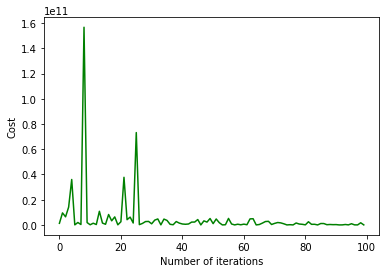

In [19]:
plt.plot(range(100), SGD_cost_list, c='green')
#plt.title("SGD_results")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

In [20]:
def create_mini_batches(X, Y, batch_size):
    mini_batches = []
    data = np.hstack((X, Y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

In [21]:
def calculate_mini_batch_grad(X , Y , w , alpha , iteration , batch_size):
    cost_history = []
    
    for i in range(iteration):
        mini_batches = create_mini_batches(X, Y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            f_model = np.dot(X_mini,w)
            w = w - (alpha * (np.dot(X_mini.T , (f_model-y_mini))/batch_size))
            cost = calculate_cost_func(X_mini, y_mini , w)
            cost_history.append(cost)
    return cost_history , w

In [22]:
w_bgd=np.ones([Xnew.shape[1], 1])
BGD_cost_list , w_bgd = calculate_mini_batch_grad(Xnew , Y , w_bgd , 0.001 , 100 , 16)
len(BGD_cost_list)

3600

Text(0, 0.5, 'Cost')

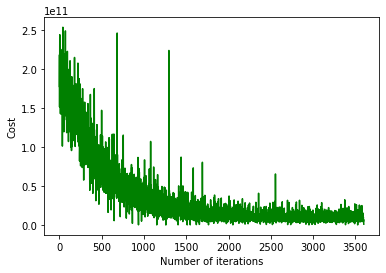

In [23]:
plt.plot(range(3600), BGD_cost_list, c='green')
#plt.title("SGD_results")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

In [24]:
min_GD_cost = min(cost_list)
min_SGD_cost = min(SGD_cost_list)
min_BGD_cost = min(BGD_cost_list)

print(min_SGD_cost)
print(min_BGD_cost)
print(min_GD_cost)

24323.04534414148
36656.630545809734
160878446204.26193


q1_part_e

with alpha = 0.01
bigger alpha

In [46]:
w=np.ones([Xnew.shape[1], 1])
GD_cost_list2 , w = batch_gradiant(Xnew , Y , w , 0.01, 100)

Text(0, 0.5, 'Cost')

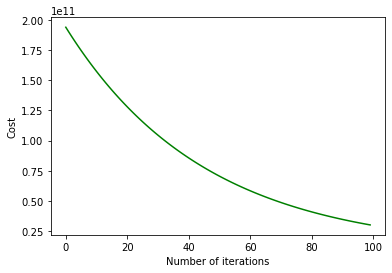

In [47]:
plt.plot(range(100), GD_cost_list2, c='green')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

In [49]:
w=np.ones([Xnew.shape[1], 1])
SGD_cost_list2 , w = calculate_SGD(Xnew , Y , w , 0.01 , 100)
len(SGD_cost_list)

171627562280.58585
66577182305.149895
81315195834.00616
153516443647.05438
119629693031.87445
183974793243.7846
163218080215.11893
168144888016.7233
244441182780.55618
92991219518.70131
76396376006.4729
87597276496.37442
314342655519.38306
48898055430.40941
219773617918.44534
153293449358.46915
623015585968.9785
87482580735.83556
109137366741.50984
38734778308.62196
128447385628.44351
23845022576.511887
21461350858.79919
48898542899.38272
22807847840.004524
102288558127.80368
21146645215.44802
75082202152.56273
166969030592.40573
15088081735.885714
112777586029.75443
34322688877.33715
46663539859.94168
8212956514.597744
76108998838.00333
11941213861.450737
10246566986.017633
46727873458.45531
34689780561.17347
5146697587.8495
148740021750.71542
6929990724.483027
18418979591.176407
2503862284.595401
41628394174.42377
41776393248.46319
41153360755.76496
82644339243.10738
1062491533.9963709
15233472064.682007
947475642.5727254
44011577116.65478
2360156921.661119
605430598.179731
187101053

1443685852.1560335
7686953.423550187
6455387239.895197
397367889.2604593
69456297.50668961
2318510184.3106103
448204988.75143766
4114069392.257658
3913853998.030858
2111096984.9991693
1693568869.1675072
691423244.0114943
434495457.9691693
20454773.318855897
1107373598.2453434
2329050018.22989
491920257.24792117
3234305285.479889
201756951.5650426
853417798.1532183
2283684925.6537266
1317634992.897575
53371166.32790644
478694095.81703764
266212104.84309924
130479686.54148793
3639720055.7864947
2083032623.935337
1558278127.321166
2310054.9293872314
7425162330.854295
2447679466.8243484
2470401055.9113345
507731498.22995824
263728670.6811026
17225386.809744205
1890695491.1415324
1483562815.0789678
16630801592.989319
3466971780.489539
474894226.6624417
796218149.7048721
403733922.065754
1751789247.4787817
225017084.93617037
765702941.0574833
2808253385.496061
732429.8433651682
635406316.4860158
2167499466.9716735
7623524240.331874
2021972043.9459662
1159530056.7026675
2340242092.598995
1284

2055801683.543749
11534496.200002799
128034948.19671704
883676479.4904246
142588771.6988616
1972662743.1185706
464471669.43204343
150550772.92658684
1046731219.5456083
914841942.8413961
121412235.15242893
131494810.15374513
281367318.6585675
3162330294.520258
804812262.8857975
766836023.8801007
472361836.60530347
12726734.514153196
752619213.0224854
3976738625.5089073
25181801.202651702
1599595159.0495067
1379259.9286837375
223713127.2176748
144078462.90038344
2180950364.1228733
230164507.33782443
319043641.0892901
24834.906721642026
397469482.13529176
652792871.9086146
1867011000.6153753
159767653.68486995
116836193.19239
387011904.16826403
1849662945.658942
104666497.4912076
1530176113.2110953
239210823.38672554
48147562.55157608
156536656.10009718
768691594.9878998
136322019.41919807
6497601.837778325
25623620.205580186
3702392387.677005
1603468.102759431
90073009.41843507
879089.8923352459
354938421.3080259
28530341.380619057
385600233.24652237
629874700.4497111
1102412964.345561
6

19985701.93808982
130153012.98005696
891.892222892089
385084316.2932254
187009174.72553092
289756595.79402477
628223125.9492446
252864194.00789055
38777601.42946854
1044123817.5316501
20456002.46995657
2127115911.086582
253337825.91908395
861930188.5425212
570727335.233605
161754507.7209303
171192.41722463144
33020934.71715419
342740944.7405441
381193382.72479516
34775763.311343245
213257023.96470404
19777208.41189107
164076933.15580204
9247343.951174729
84204536.7324146
6583353.248378938
1568381338.2689686
30839913.72471929
131755666.84747083
3860423.4809734914
5543191.925182979
890106764.9823847
1487.1013406441348
6813524.641942155
19580417.790339395
932643300.5063198
1519530708.181936
6263811.790271102
1155525109.617842
215705985.99567518
555262.2011322732
397998907.1225718
208678736.41658464
44357216.46442116
1137425485.8096967
5637930.442127768
669387704.665493
45942510.191630244
529112755.7940138
312406415.61997527
92436137.58272272
2260822.6590722096
21454711.70074784
1478303795

27492895.195862453
195980200.6567675
1213407.1417497816
5766802.408551101
428430244.585486
170458549.0676829
158416977.2280828
433620452.35087043
9798504.099013062
259834354.54731664
604318102.4283077
2045805.957493028
2351102.0632489487
252648596.3439754
30344516.152530782
51119113.29662538
282282903.1251711
429097675.31067705
550260085.9127097
20659322.39424311
19207205.85483852
673850154.0292704
113725166.22444238
22750595.26567989
11876232.942368839
278859594.9561139
319410598.5212671
310028301.3441651
329738475.69748217
471700089.4183132
183748116.02692252
103126356.12731573
7629767.954257344
4857507.763359914
317782182.79206085
882736414.6553382
361301587.27756435
34962202.719734095
334196416.36319584
198650790.09141827
109561085.47742139
15803157.029668227
760596942.8109149
754043.9888614232
7736193.40935974
145343414.46353713
165441040.1076145
241080997.13397917
128623658.06324548
26380290.616892498
192831860.1376948
330617555.89467365
1148593948.34061
1151497400.3107512
160964

25774469.040854428
133381128.54997171
495223060.25180453
36859293.71674258
29204335.100365076
72165602.71812451
546151008.2454772
345748671.2269163
72318508.95295951
160702511.12850812
83696293.55164896
126404897.43992521
129106031.01647484
369533595.76976335
125478935.11086877
146111904.85497224
49472591.68321534
9948799.908109004
25177842.959537383
4436978.0244748695
134463952.77941
335239862.1220165
6008809.050485864
80502971.38012427
394121758.34697276
2277585.388985858
271220687.5385618
269173299.13667667
137448359.51161665
554018755.348473
101008343.67456415
47753775.44813765
38558572.16856539
421658297.99165976
15614599.804445794
66991726.179903895
118597966.08954453
176982723.24976897
4321476.946091129
329238058.0692553
432180038.05893975
68268896.49356341
230604995.9670022
106019848.41831744
282228240.9894891
426112847.55460215
159763681.3241767
242014543.44314006
34100174.6714375
218287067.01690292
186661.33063546664
34990988.432711296
308748146.65209067
59570689.45170176
659

182443268.78038833
138226109.1152933
82778869.08032566
48306407.71752918
15348872.075671742
86120659.30269681
1841941.4296305003
21562.1566463089
749909545.1388264
74190038.12539564
228005946.16063082
42617064.929334946
1509511.1583497904
181576155.16772988
5258444.842213442
391287958.08048266
275698162.14274865
186883192.09503415
448638443.56727815
8108941.227314604
372336577.8843702
11752077.263356129
67781752.41755515
292969330.1023936
7928750.3627172
608077683.9124187
392392893.43121445
55887239.96926071
174682771.22474107
165499343.3277751
917397184.0390378
165125430.7419509
211388523.93773085
232654850.4010608
170072253.40163207
395566007.2100437
44771392.4830742
166530039.25508794
138952579.36943614
281924944.38977706
180411841.80619037
70230948.38645491
34359554.0176875
1374521.216902697
10138440.609226948
288225345.3605165
626917952.3737978
67214609.44120358
389667764.7732611
148713.92003664825
115242418.39194821
296427817.18534476
429554010.0632692
212799831.18882048
21643959

240192946.6670937
257187370.49636567
35398344.88099372
86703690.57204427
371309924.28880763
3296637.0437805876
115581669.000088
6855617.267258237
13463779.145091046
54763204.72426283
20571227.935127925
11472246.751382066
613965560.0568651
81499308.56857178
228233617.6785663
40975631.04606455
228289844.1070876
1194958.2131757939
164151783.04414445
578915240.8718911
106563944.36966217
15722505.235094715
18965796.937365957
17775463.852909155
5707618.100083551
433763456.82320136
776020007.2056453
15108890.361609517
231665141.55065945
107660656.0768449
23133760.095493197
17667975.374194853
106759759.12173253
145107622.63854605
3219590.7189597213
20580029.11893521
93293446.86168483
6209310.857473629
40715834.08924731
114454904.2381646
4319.04628662243
439987737.7625037
272650971.94518757
5315416.506300972
44744666.20736656
424972277.0164568
527349172.0360141
8769567.030828543
22036478.92241183
22114885.95297811
161884975.6890645
182741980.7697183
79909118.39805911
146162477.23604444
20038244

166906997.49020803
28072194.20147136
14012556.058994858
126408384.80353251
233615879.83213744
58748972.751775235
13807575.118916746
377778603.13482815
111096546.70537877
55744221.78693309
5017292.652609291
84659084.1556087
388709725.53031284
7863901.602828383
379237610.85513246
44703200.349664204
143789953.36674464
24441398.650335316
123164585.82500142
30176998.456830014
96289055.79242073
41426202.47848103
79395328.3394848
137651150.24302277
10312049.078847265
20911604.29250945
124234815.57948422
476682757.5491194
22364168.556707263
21652019.20186067
27722439.069556963
355713802.34270954
362335145.4369063
378066003.26397926
185992077.2048227
315223379.79847175
25208802.103460528
20999445.686646774
198229527.93129256
5967652.615259607
167158.36260708823
24735279.026848238
224864733.41058975
20054765.03095841
204771346.2515935
111795083.3438219
50584267.631854415
355208792.8019781
15988093.521663554
128893704.66429877
38289559.861376725
39365260.46805198
175249668.9715666
245950871.00251

147821817.78650233
221725183.43938947
49337843.75627394
91696334.77915582
90552666.69363043
65936913.40694178
449439037.9168696
53781.642771887
338865981.3756913
45235042.38918982
157110362.42665124
419719878.4699932
2219305.247559346
481777722.41679853
16064567.40972367
526715.2501811956
145826168.17173594
40970492.633093655
5032707.5229434855
15442348.850601623
154692884.46676454
12849595.169583617
72457783.85692564
105610251.64687814
42140727.77316582
38635620.738747925
57876459.841097906
125712652.17775673
11333319.806367988
4828263.398897942
43701324.710339226
110250127.05407794
124792991.82300533
146312760.19931808
5392.794089143642
433147482.5620782
197229113.8267923
169170164.7896386
86806089.18325828
134748552.96137372
441072722.18507534
70540.65791120107
41301830.54338032
24101.2665646259
71477201.8138776
251738040.18149713
9429948.196346479
323841937.7149236
17308613.89736639
370062365.98761624
303659143.5569519
26045165.492354564
100149905.05662158
61154318.26525935
1024586

170101190.401384
90807253.64731644
96315768.10789436
267972870.5987515
1399462.5844995219
78511400.0546632
14097088.971088866
74740409.29691516
130162774.82829577
25870694.689755686
102835.41156627922
149190493.4567323
29946670.9164636
116194346.58816594
14039147.60810717
25799508.183643438
2158529.153627617
46080208.01098985
40173089.452043146
150551992.29468265
237283614.14754617
54609196.84223586
232105279.5874094
91161330.26497237
44773139.798885226
75574045.85960099
415560075.97166234
11477351.533972166
66526542.87389893
299493059.92434126
1773272.2101300682
274523703.4389524
421435639.7909899
144444497.8887808
362571129.4523451
128948926.1782768
212597710.3846321
109351177.78641176
28028442.14586287
29337261.23773298
170066150.36456636
285847263.2104418
393985505.87019885
101306478.66655026
145500067.84259763
330921.3332626422
403446180.23462427
174865529.55177993
70967435.01727733
39879539.697270885
3177138.1930010887
342147562.0115586
13784550.672619883
36106755.14477001
992031

334313520.05037355
201673253.01294118
50521413.697896466
3855013.6023198934
175570.42182957265
194263139.20107076
23917208.312802613
638379399.0185391
80791608.72433186
15335144.973530617
35686702.652925946
83643188.27273387
144048887.30199885
311159379.7710633
241862502.96436012
202838386.22154215
138102084.83576787
607004565.0319709
29432957.69547513
62444567.92716535
219309509.61259034
75067719.94402507
441108079.91298574
21277706.829982962
155210201.2057911
152883450.03786767
128235757.28575774
63475893.31544176
383825708.446879
57204274.520491935
371951.6313752806
169519193.97837505
165002885.62444082
55828395.9695464
62419943.28565464
34187957.4374251
618526247.9912564
268921676.75200903
257366879.21002513
203594683.2755291
112470382.33721761
36678251.206893004
13297185.226808306
192006410.07333428
47778053.787744656
81576522.36577193
523591427.32055366
41670990.57864487
245416619.2890338
170265419.2305673
56231027.8511128
97273983.23039535
89818961.8362284
441185802.6553335
6214

46639057.82950489
226710278.58802265
110841333.16696659
110117697.90557338
51044.04814700509
45007844.882225424
452577369.9310747
328080148.3597755
81104375.29768808
42143131.89981725
119017928.59828305
873743249.8809665
87962553.9604668
29985665.291888777
15222377.281665634
89607069.14061792
33938610.62803067
4082367.3733940665
21640494.496362045
110336828.04283212
6359876.834758679
43967995.5493824
58958872.870777525
213343966.65366134
7378728.906739727
5249144.679260765
344414668.43041897
14740104.113961626
286272534.88725597
258698499.6359012
113651058.41867964
137791785.33588034
147884300.0182677
333241.04120691156
24184975.112184968
5567402.040963322
2128148.750498332
3616596.303088293
230687421.40169865
25099007.414461598
3603747.971821925
541333769.1308701
93045525.52006987
507715993.3405599
264482101.0718631
2104262.054692651
45849685.65263769
20528364.45317572
20651111.976431284
613361830.6451188
422821588.20808077
13789156.27466816
164348313.48505405
421587011.976243
4188007

31317112.28875082
280022703.4333271
5245038.343706761
437298520.2112167
99290393.4974868
81427515.01367371
32282834.2353564
55753693.55799067
113840014.61581427
11762801.447561828
244214950.26703954
85661527.44863738
3707159.8145945594
290052693.91074836
13817346.298207661
4829.9585909965845
204684745.90755
20027370.762711473
601163051.20967
122738694.2826743
18998492.277460158
145072066.60525125
2294854.5242158314
200925238.590777
367717981.13008326
404206313.30558974
59367033.117281325
391424.86492451606
395350.07682681526
134993344.79194093
203660725.778121
859457912.7536701
1965316.2120735876
2475974.3810217367
56699086.52412909
8249977.394367222
208954568.00082225
46456061.97778502
255823336.34958985
23427818.605392743
244092327.13789442
211768834.07813948
3249167.8366565397
404907786.49702895
41185798.65962194
66942876.61540474
1264636.9369070993
147478000.74707964
170553465.56788668
66209209.36422497
59607413.69571443
66362303.216240056
31494994.62305245
110032855.83171488
48675

231083498.03714624
144413535.35322315
51002028.89320552
18824607.371214353
18192198.41147094
8380049.329229269
25130382.42397017
21062005.23613034
70088326.52751034
84836223.86606513
63729228.85131966
187622060.62725517
47430826.330229126
757389826.4012915
405103333.23629576
5156749.688220267
449093.39724301343
655614929.6900516
131357916.54333414
79546704.3705903
68713072.60154845
54319514.38117026
405192829.468646
231253240.99133828
34692946.344395
184216485.3368527
14106748.759765042
43887507.852588944
3810355.0716963545
516344528.767562
9642893.514138674
307296831.2884053
22531549.69415591
412634674.3653882
234356461.34391382
2039792.4085914274
30961935.616884455
85514661.88455358
20523423.5219825
308749696.6234302
2421402.884454444
1321600.1045505248
92491949.54723339
61257734.16878955
14046257.299016181
225434302.7122552
240764982.1483734
25742602.413762096
66733210.73562735
484033666.2036258
426130935.2303046
308755320.12929153
500023469.8779549
1585802.7255074845
111609229.3228

74448842.2761355
142232665.3992949
375780697.06407446
2182508.52968441
195932111.7147564
105889255.30557133
13628894.883627824
222410217.60810623
19694776.431629997
120319238.60672285
23727255.71543307
437760422.45766366
35714303.2555826
62342988.47314234
74184899.66267848
228539003.6839299
7492619.57836813
1723850.056322967
134212869.25864503
226553529.80463833
123381042.18120824
13510.488007190177
105713985.4367116
261292817.04234862
481264172.685082
281539887.5665657
117322703.39240728
25284559.00561759
168330441.57887673
1381351.5336723065
385500739.3876171
144864066.62465525
477786244.1807357
17786159.26669158
9341596.510120139
286786444.4611135
391603101.7922518
145281718.7660465
100437339.77827635
596698.2996984241
65887365.100425415
329227.7526257146
59973612.15734946
91044398.25300646
477891542.31483907
57863320.67985292
17306044.117905784
9999314.648066401
65561041.61238906
444416264.70028967
411662910.327711
329369592.57121253
235577469.74746338
40656163.731784634
301727993.

27352650.89894572
253401218.889418
2992.971930607819
52657660.137239315
13366071.053632151
918537874.6797817
126519632.4313132
59291269.00407681
22446958.832763866
192414722.8071811
4746188.069096644
82176424.4579893
8030331.347191233
41828646.83445414
251733290.76269397
12148154.663812796
408997224.7325637
6802993.345046153
58778509.67351358
231757931.85496512
766233918.5741932
786393717.0066626
66811727.32510691
362436257.49947643
62523228.6472986
1640796.1450318694
41284613.10442497
591146045.684362
211571819.9760226
236897997.5124011
16385285.741220316
601864717.8851161
808390.7629183624
120108779.40679617
260854483.9049259
712421342.0516057
105115711.00162998
18174112.260464493
75889955.67788461
171477616.66661355
4480400.210855007
202672508.74058416
66220310.912884295
187615832.26272118
96413825.72065362
38076425.22489993
787336890.4789392
201924795.1943308
1044140.5178097589
3845599.773758781
195851679.20091274
404244602.1690525
10554198.622640917
114495003.89228043
75141303.049

669558.433523699
16716106.52457912
219980998.18696457
61040469.88984397
5640438.156347392
120825500.3712507
79356096.34808928
75690398.00891061
159766590.1238546
149565706.03477114
20246682.613674592
163030145.91889158
9691285.33017591
98644677.15589644
11231158.474045862
29676337.379831165
110099564.33878732
383458963.2676414
3163664.498087228
27485186.395626955
16001001.135417625
194739694.52560434
300340519.7740262
263300512.54577062
349910058.2290801
60514667.43711657
371422675.51346403
152344507.4043946
127686568.866997
4904576.13008079
6514569.619658372
60729903.686751336
162515278.47326395
23541525.74947014
291757858.00479233
174387893.46101904
350087741.2395505
319293252.9245818
51959765.424166135
29902045.848263957
28305104.808613688
68292066.85976662
65731375.85774282
2232410.990803871
45506780.08644392
236689508.72403756
213229360.58911145
86062919.59565999
348775303.4398689
103329369.05583131
2041563.5267035647
90687976.38539638
52585536.17792666
1975727.9016264556
34712112

589208336.0300249
2619770.2549429177
504705713.6759109
135724.75829671748
70464357.37887421
168481584.80738956
1325139.4170644751
1670069.9717477509
90032804.02261932
65529087.19425337
931690050.231224
162208837.8454151
24518159.581685342
169743016.33502066
16714791.714246668
1057732.734154719
25817166.595111415
395934534.50675344
273938429.0052473
187613035.28126955
39630692.18325473
10769735.683011131
1710343.381492639
318098853.7776432
98463700.33082165
14262259.395858813
394297294.2594402
12974664.733739298
32237954.69115433
42747048.80764623
26785846.217224106
30462724.244753763
9821346.160400877
791452.8940993162
68422.86266675465
9713187.80164432
45749251.530643
73844722.73419812
96175252.30588998
685813.7583243673
649718121.4799591
219539058.75565627
91324883.22408897
21904547.868934944
59966848.769630045
51293790.06148918
346253389.1932255
108451838.66439031
786272558.5412017
427999255.1804678
54930520.17647891
85723731.59822129
18902020.70957258
30682913.83039706
327590487.69

135715637.48590177
11675613.654082
154982427.33721337
242811703.26132107
447206706.8749533
935082142.4080454
166244554.9509572
5405800.823979563
128541423.71357377
397806277.02215844
67867548.72602655
551097.8767604304
164891938.03079727
16511029.879557628
61460119.85240684
200490411.63991106
668236.6595307105
191398518.12205827
279847773.8227585
438112761.492496
304761471.94134855
774198.424150547
116059836.22797462
164744526.02053452
108072953.1235691
1511718.0672723118
24942256.62973085
543948.6426692742
122420191.53255574
144444497.0666767
251151664.7080278
81309669.63024962
520689196.3881251
38915214.11218555
187139636.41768453
164051051.20905992
2537766.622786492
163392172.89096445
15527301.830599422
138910888.86816868
190313003.3094415
1235034857.2651935
905660.1921381673
47767449.623679906
143310785.06108105
174428940.248662
98690960.06143187
223401459.41384524
215469084.29600483
128277696.16064832
83221957.73758999
132077331.51423644
4253343.242204447
110534519.93026479
965699

5146.664446296394
61283966.785873994
79114486.91290396
17432098.60049974
833088818.098425
315027173.0060929
130763249.65184873
9177043.015227318
7094203.962393447
28748063.70686188
31579.98238619331
199377814.58697993
49228982.29380169
68436134.08917204
377869854.7777936
23962882.97290552
28451649.1595626
15318921.173229631
16785264.13568335
135042563.88136056
460865292.97429365
116574383.8094718
131684345.82198298
441481697.1060554
15005816.436164128
13964885.338133141
6519039.702203627
22873694.280019265
64583900.62697076
25384777.832922686
799336.1134949051
433132452.96835643
190650569.92613134
4252482.942908855
49408839.20919402
39920752.761132345
295235722.78445244
459740000.7354069
88376533.65470982
20405834.0279368
66874481.18098699
449966531.51772004
20855059.010762617
248391301.9555434
323408055.60990316
468707.76729013224
263838664.48229438
146037843.80807427
64255138.78180768
120179200.37467097
293702189.738287
112014.8100084295
37938.853509933186
83033549.94468537
205660215

6472746.889163502
22512739.43074965
399584155.2049842
16889538.258428045
8157373.044508626
172948.5001418922
41203879.864465445
31152913.00036384
105588058.54977323
71152812.16124785
130834673.15618487
6660028.49035005
14974984.216715993
26851758.70087755
95760947.72241336
1110992519.607717
21428893.450660843
218422171.7823485
7340288.302683437
139857902.45606467
346385482.7204848
156508785.82786316
4967579.457296996
56446885.248127624
268210693.2668794
235416668.21070036
19217743.90697407
96813487.12792954
388153493.04133266
70576115.30743065
295764.4142326674
248601833.99766448
407996506.4353863
7433881.871879608
161801419.82533422
81751564.98002243
155792823.7347904
8920790.65020777
28789193.211802818
130645205.61720532
665388752.1856306
6483061.89590393
713219.0718839396
379959402.75883454
427399480.2692948
91273158.11928141
135326441.2826212
27940521.78555812
148107619.67229116
6814125.49888754
4126251.314727146
424415430.1914669
181280445.82838857
451096093.5014614
78474035.01874

263635004.84727204
109820582.1576332
97870244.75316656
6750451.762864939
244325592.23146862
390961.3053093905
260191572.40231094
57027220.266905375
90135.62653817795
49101705.0450409
20518019.22866972
636516152.5257181
161431728.3647184
16806267.368306015
76642855.95135872
56645859.00172498
2708206.313224031
3915033.8480634
55839974.825723514
219041781.87389365
331478221.7540508
97378203.5039907
50352522.89906226
15331446.949003322
499931562.9455171
98061022.20203266
177106520.82975245
83626522.03925645
48295829.5409115
38670417.6055786
1566712.2411137647
110782565.87160556
142119375.64511266
196816550.19593993
1059730036.0233285
4674428.599566449
83113874.43760374
259921367.80138218
398448365.08348584
3237046.196981976
8845922.66920406
66765743.02036783
327208656.7301103
48982974.50408287
320529830.2323253
208396879.14969265
885795455.7345659
3334267.776884163
507881641.4195607
90640370.68280867
88887706.7233636
188429496.85386658
242544988.27355862
46139649.578468
35662294.628726624


100

Text(0, 0.5, 'Cost')

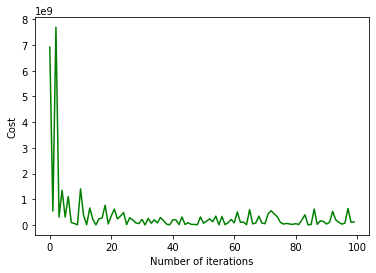

In [50]:
plt.plot(range(100), SGD_cost_list2, c='green')
#plt.title("SGD_results")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

In [51]:
w_bgd=np.ones([Xnew.shape[1], 1])
BGD_cost_list2 , w_bgd = calculate_mini_batch_grad(Xnew , Y , w_bgd , 0.01 , 100 , 16)
len(BGD_cost_list)

3600

Text(0, 0.5, 'Cost')

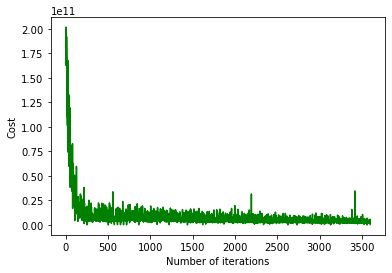

In [52]:
plt.plot(range(3600), BGD_cost_list2, c='green')
#plt.title("SGD_results")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

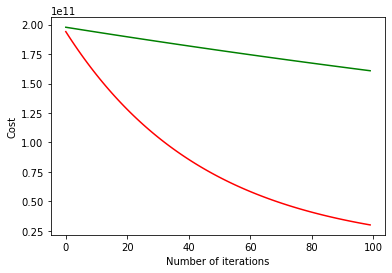

In [53]:
#alpha = 0.01
plt.plot(range(100), GD_cost_list2, c='red') 

#alpha = 0.001
plt.plot(range(100), cost_list, c='green')

plt.xlabel("Number of iterations")
plt.ylabel("Cost")


Text(0, 0.5, 'Cost')

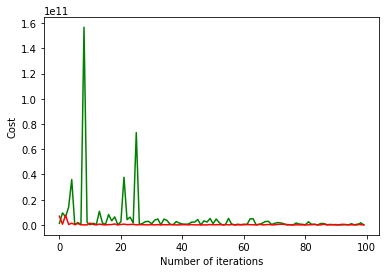

In [54]:
#alpha=0.001
plt.plot(range(100), SGD_cost_list, c='green')

#alpha=0.01
plt.plot(range(100), SGD_cost_list2, c='red')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

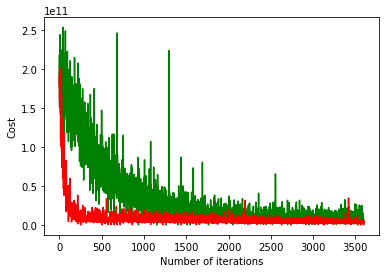

In [55]:
plt.plot(range(3600), BGD_cost_list, c='green')
plt.plot(range(3600), BGD_cost_list2, c='red')

plt.xlabel("Number of iterations")
plt.ylabel("Cost")

alpha = 0.9 , bigger than before

In [58]:
w=np.ones([Xnew.shape[1], 1])
GD_cost_list1 , w = batch_gradiant(Xnew , Y , w , 0.9, 100)

Text(0, 0.5, 'Cost')

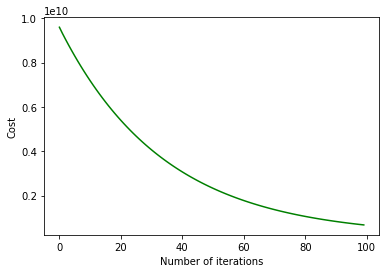

In [59]:
plt.plot(range(100), GD_cost_list1, c='green')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

In [65]:
w=np.ones([Xnew.shape[1], 1])
SGD_cost_list1 , w = calculate_SGD(Xnew , Y , w , 0.9 , 100)

578832816596.0717
524138564743.02875
374352394018.6092
288425508864.06525
240034099692.97018
203416072439.62802
1352130396679.7388
1440336325603.0195
2257090261295.1924
1358016718340.572
1177001357247.2542
979854229029.7615
1169380719141.7344
1283510592438.8298
947661589996.5466
1016549613432.6343
788869605200.683
713191437087.9868
3285722821578.4727
1608769782609.827
1282330694796.299
1069219177865.6575
771290632530.9207
413272160859.31805
285869500845.76355
272477315935.7971
194627284916.988
733651928920.7007
620001118012.6343
510433928819.96765
532621322443.55383
261330678588.45358
195196818952.85342
76344016591.02397
37859775170.68086
51704202397.97281
33989134386.51007
325798374993.2187
347030091850.0416
266296887782.2243
272314767292.35632
177234941099.19406
150387762326.99875
86915555408.10352
70209656205.24695
20323618358.84687
7026925887.328254
38273733643.902275
27025401536.48036
11807880229.159187
5264946240.124603
6931204267.268797
38387873413.07847
67472854037.58553
734172

1.3368317312761657e+21
3.472535510340553e+21
3.828459362674517e+21
3.2401523280101864e+21
2.4921832592054954e+21
2.0244202133537541e+21
1.4161680848711597e+21
1.1203074314999228e+21
1.4670338103012331e+21
4.491472956896248e+21
2.3854093125266283e+21
1.8843194270974146e+21
1.5246780842042068e+21
1.7434788009641844e+21
2.0499483226816268e+21
1.8674343959212387e+21
3.41274136070613e+21
5.866842668594612e+21
3.8859990341281015e+21
2.7977418388476584e+21
1.900451541964503e+21
1.4267939278632864e+21
1.264414502700938e+21
9.850632915832474e+20
9.500582571548981e+20
7.690157599786119e+20
5.1963282882042456e+20
3.8842347607990056e+20
5.723667112995067e+20
7.457985845897683e+20
1.6445026421260828e+21
1.0837427812031339e+21
2.3066858466750628e+21
1.0447831668421105e+21
8.060499284634246e+20
5.375035410279322e+20
4.03369191923193e+20
2.145551837523405e+20
9.353459980354993e+19
6.155128281432035e+18
4.803021453447225e+18
4.325753723370314e+19
5.7970584535261225e+19
1.0694015760034191e+19
2.32722054

2.3607346833423906e+29
2.896999184880212e+29
1.2701272709606306e+29
5.959458703943955e+28
5.6789756978436786e+29
6.413789881910288e+29
4.082706098479202e+29
3.2055710827480536e+29
1.951540497515044e+29
1.3756850646135892e+29
1.8857011390267106e+29
1.868048548126999e+29
5.7051107671509374e+29
4.847562250338362e+29
5.41825193243327e+29
4.2232981927185235e+29
5.321376434367823e+29
3.18568206656935e+29
2.920969379340832e+29
2.3517874491720187e+29
2.4689734286793033e+29
1.5432478030068975e+29
1.22995816913032e+29
9.251455551391324e+28
7.153613031537623e+28
1.7297390744201973e+29
1.697179068109779e+29
1.2812604593293327e+29
1.3236527669891652e+29
8.133455253031815e+28
6.79412575663286e+28
1.3280681348075588e+29
1.2303854071311076e+29
2.8167480374458266e+29
3.326785213799345e+29
1.842657030988012e+29
1.7597687556086816e+29
2.24184029576408e+29
1.8090960347512047e+29
6.777072032255825e+29
1.5725133696779123e+30
1.1176124193728115e+30
7.914423051736329e+29
8.906468305770043e+29
6.97716491300507

1.1786878110544218e+37
3.6751494200815146e+36
3.3619406313794764e+37
3.3676713274235017e+38
5.684111941966362e+38
1.6535829172758843e+39
2.3361050178055597e+39
6.282909742645647e+38
3.493501688354189e+38
5.484985854103255e+38
5.935448425843738e+38
1.5319864393161552e+39
2.159395694359694e+39
7.462509556074264e+38
6.880510924583173e+38
8.505844538796559e+38
7.498016134684874e+38
2.977162679528099e+38
1.0373475712291178e+38
5.5570293328336e+37
3.9833811366290195e+37
3.909250247475999e+38
8.147592806591781e+38
7.840432859931002e+38
1.0762429413612847e+39
1.1539334164952894e+39
1.0217903282361198e+39
6.95523127378726e+38
1.8122534393416575e+38
1.833692486072607e+38
9.114973513558546e+37
8.342339948730472e+37
4.431623416918333e+37
9.001396608935369e+35
5.992422790246163e+37
2.1215037666828783e+38
3.693708310830123e+38
4.207181219249465e+38
3.324190912448051e+38
1.4418413714452e+38
2.360051951776505e+38
4.286706139057372e+38
4.036534711498484e+38
3.639967676761072e+38
3.29050475320504e+38
3.

3.831059453274809e+49
2.959432378903028e+49
3.3552185503291183e+49
3.072892982029707e+49
3.3279608604673744e+49
3.0139825464820645e+49
4.064547099665998e+49
4.776665313792608e+49
5.248491693245326e+49
8.810043402736082e+49
6.267968417843936e+49
5.59121101205168e+49
4.093203236092602e+49
4.205680991978131e+49
7.512021803950647e+48
3.664341033038307e+48
4.1838806917164734e+48
1.664561525276596e+46
6.580412288049525e+46
1.4113452710004262e+48
2.3520197106945994e+46
1.3148734022345192e+48
2.527974710428426e+48
2.566204556699197e+47
4.983581581723965e+49
5.929597396561525e+49
6.256022822124336e+49
8.822926545227967e+49
1.0066354520177088e+50
7.959675730082636e+49
1.3340700112464258e+50
1.0816595236974804e+50
8.36925609170178e+49
6.259571476812035e+49
5.970363041448445e+49
4.5560372886534953e+49
6.255161483843704e+49
3.203901287940331e+49
2.463333415182459e+49
3.2644525899948004e+49
3.9603321201518727e+49
2.1346659948461146e+49
1.72297684788428e+49
1.2979199030858164e+49
9.806790511919466e+4

3.1419516183141163e+59
1.8190700514513786e+59
1.4297054107124309e+59
4.020281841018794e+59
4.4766190732728095e+59
5.077057618421211e+59
3.945784450459599e+59
2.8961022244575494e+59
2.7244740485069344e+59
2.371460585026827e+59
2.6709967950452365e+59
2.1561719674250985e+60
9.338900759419485e+59
6.912761144244154e+59
4.360405646702909e+59
4.374621009014029e+59
4.07497639611693e+59
4.602921947357318e+59
4.784413836948691e+59
4.286716048452672e+59
3.1145702932345954e+59
2.5179296377793408e+59
7.036221265268342e+58
4.9704319350363985e+57
8.576425797714077e+57
2.672616380936785e+58
6.583193140216412e+59
6.219063336752075e+59
5.643653953748988e+59
4.260442300732062e+59
3.481415399285011e+59
5.0723914558525e+59
3.0060980338789664e+59
3.740321196641585e+59
1.911506124604894e+59
1.7590698442539808e+59
1.8038996320807736e+59
1.5947855704733062e+59
2.009180553310942e+59
2.6472362775476386e+59
1.7352697593776688e+59
2.09765115941305e+59
2.3323732651679365e+59
2.088809794214807e+59
2.8854017828537823

7.967105051668976e+67
4.397291626441448e+67
3.7073557344701366e+67
3.806452739777803e+68
5.472948671434974e+68
3.4095981957568294e+68
3.370248748247971e+68
4.579561925148624e+68
4.0616661613059787e+68
3.1063987467386722e+68
2.5830617278364925e+68
1.6400771744397805e+68
1.3965422652489872e+68
2.6696857965332935e+68
2.712259837149195e+68
2.0041676370233287e+68
1.4737862728131072e+68
1.5650493040296858e+69
7.821164885389966e+68
5.3781232888025895e+68
4.386111348802778e+68
3.412740769846022e+68
6.532088412890948e+68
5.472025576084027e+68
5.176826603912763e+68
5.995517433121679e+68
1.9659781872139994e+69
1.7656805027906734e+69
2.449986195014829e+69
2.5935867653683385e+69
2.0585882406288934e+69
2.577834143386395e+69
3.729770774636533e+69
1.028698692747034e+70
4.814569698605326e+69
3.727033590817477e+69
3.4423296045139988e+69
2.8937532004927072e+69
3.806900773463905e+69
3.2059277409967267e+69
4.852804269445638e+69
3.897768940245812e+69
2.7251015091238488e+69
2.382323313015739e+69
1.6843250034

5.925831583193337e+77
4.968553912144625e+77
4.177343141328503e+77
3.446388589593578e+77
2.8523203844774545e+77
5.528468606549513e+77
3.696190642095554e+77
2.672463757810445e+77
2.446010051057352e+77
2.8569528454149796e+77
2.3891219061136934e+77
6.200553336972267e+77
2.040321525518679e+77
1.7733118492726414e+77
6.825826398994298e+76
4.170518127412249e+76
2.433384202959514e+76
2.7090636531933075e+76
3.3033131275559855e+76
3.14372452438273e+74
4.77077971873525e+75
3.0623812391118993e+73
1.102401407133461e+76
4.634860493310948e+76
3.5980481866899487e+76
7.878845423720432e+77
5.518882481822825e+77
4.5517362974179726e+77
3.62499859352802e+77
3.0876488669489653e+77
2.3091007711559626e+77
2.050423319729917e+77
2.37567380439609e+77
1.8960472005976077e+77
1.5830012526164297e+77
1.2303265484111528e+77
1.1295182779391263e+77
8.595262401600463e+76
2.1165688980596415e+77
4.631583931982861e+77
3.8446395945036574e+77
4.420787611522544e+77
3.11751719540661e+77
2.42429089972981e+77
3.497385736674194e+77

4.931393490496551e+90
4.157115809707492e+90
4.34443595724904e+90
2.844884789103821e+90
2.134110195596102e+90
2.7885270130462573e+90
3.543921962435421e+90
2.0369926257860484e+90
1.6774564956494391e+90
1.456602705510279e+90
1.531327437144368e+90
3.002650198530602e+90
2.8747384082337923e+90
9.630361663552181e+90
5.162522386377478e+90
4.306083357764969e+90
2.469430205709453e+90
1.9413601320283257e+90
1.2234315005266656e+90
1.0085538861780015e+90
1.6890176395670809e+90
1.6899428205308459e+90
3.0683179599747326e+90
3.6113637280050043e+90
2.6026391554807694e+90
3.3653163324744096e+90
1.446469617953352e+90
1.1780186294228685e+90
5.507972313191609e+89
2.3605650497992023e+89
4.406827713161929e+89
5.041899984523019e+89
4.742357677266497e+88
1.653549990425871e+88
1.3022272813180587e+87
1.6538707738036677e+88
1.2292484393195537e+90
2.0267210355832739e+90
6.636808079064865e+89
7.370936898243066e+89
4.821550982516355e+89
4.5929029135176517e+89
3.160003791426457e+89
3.7627357940121505e+88
8.5790653716

7.076956801193018e+96
6.323902341927524e+96
5.522234685599796e+96
4.1654477293879254e+96
1.0159933332562784e+97
1.0089957928570565e+97
9.170459285091215e+96
1.1375884223166389e+97
6.795264381369117e+96
7.165263251296894e+96
6.611922089355034e+96
5.487284045463258e+96
5.790674573544375e+96
4.495337835741756e+96
2.901209705108662e+96
2.651335491284197e+96
4.647168075938511e+96
7.275629802303783e+96
3.5744307777088976e+96
2.9153007207952176e+96
2.4281085380563016e+96
2.0339661983469334e+96
1.9384263630254666e+96
1.867681148559577e+96
1.4862141974139207e+96
1.603627483753504e+96
1.1672065383289955e+96
7.024460135319173e+95
3.434989506568712e+95
2.3124062364975728e+95
1.9324360033514954e+95
5.455599946412203e+94
7.427639214839225e+93
4.556200260198385e+94
8.780426607369284e+94
1.571149115592642e+95
2.0501855916862283e+95
8.28246525836909e+95
9.125621287726287e+95
9.05398190167633e+95
1.1284869917859687e+96
1.2292807035529327e+96
1.0145618619647389e+96
1.202440439036299e+96
1.224751276991767

5.580510363030902e+96
1.5743099405184362e+96
2.0881586609938594e+96
2.029028074066847e+96
1.8018297933944045e+96
1.7831562808328393e+96
1.246222319119723e+96
1.348331102343311e+96
1.4778234987338079e+96
5.0656119924313e+95
1.7890857974402375e+95
2.4109658284486128e+95
5.542742630604802e+95
1.5447183095338169e+96
1.3865413097864923e+96
1.7413247409906733e+95
3.20726978617503e+95
2.7886627038140893e+95
2.7175548193276466e+95
4.367648311633088e+95
2.876959673818762e+95
5.558292297015572e+95
9.400505822507238e+95
5.41999962886069e+95
2.3369149108231414e+95
2.064986154835545e+95
2.76984750757541e+95
1.7358386694572004e+95
8.698286422111772e+95
2.3082356031759186e+96
2.516159040496469e+96
2.153249387138748e+96
3.2792176261982804e+96
3.129353127982903e+96
1.3621778064392083e+97
9.622993194104376e+96
8.108480328839824e+96
8.313556178535863e+96
7.645715731455767e+96
5.784113480184139e+96
4.214931142644625e+96
3.2895001702654957e+96
3.035611970413518e+96
2.6399752334905807e+96
2.0942674827491968

1.1314671421980494e+103
1.9955180324325043e+103
3.374220589257854e+103
2.6765631443227824e+103
2.6437217335756134e+103
3.924512460760277e+103
3.0909064838190415e+103
4.348100957194853e+103
4.067485300762871e+103
3.176878034535866e+103
2.9983181036806457e+103
2.831018258567528e+103
2.869562718558212e+103
3.4715080884266554e+103
5.225828173515719e+103
6.756715663987713e+103
5.275059026859529e+103
1.4489766350192452e+104
1.2160007280030207e+104
9.611353465144218e+103
2.0855300594274858e+104
1.4584728054764872e+104
1.6122420568658107e+104
9.783843086929906e+103
8.406499621056066e+103
5.563818150663225e+103
4.571997836539099e+103
3.1379073155025763e+103
2.510963512814732e+103
1.2548602217180494e+104
2.0133357449672715e+104
1.766756079240358e+104
1.680874640813837e+104
3.930254681583265e+104
2.7387310702766564e+104
2.466409025053312e+104
1.798841362706699e+104
2.1675384938713207e+104
1.631950719646836e+104
1.3053593622589591e+104
1.9052024617422905e+104
1.4085525225865934e+104
1.184245518254

1.0956475080402953e+108
9.280771728322002e+107
1.524311001686292e+108
9.870749125160735e+107
6.994929145945727e+107
5.0521940607868493e+107
5.556430686653788e+107
4.0318403856668153e+107
3.3302209157201436e+107
2.9048176302816144e+107
2.1330277624864535e+107
1.8228321528232666e+107
1.3493531800691646e+107
1.998934639727958e+107
3.544152490837454e+107
4.2964618638607945e+107
2.8908929441823328e+107
2.2761071079737934e+107
2.8166815824098748e+107
5.0178223933132085e+107
4.908913014596251e+107
3.2762952835675534e+107
3.7081539743936625e+107
2.5795287940376557e+107
2.4830861279228454e+107
1.628756684030191e+107
1.2581081138167443e+107
1.0399712756660312e+107
8.144086051283067e+106
5.840286505281584e+106
4.41111676406923e+106
7.916046914240397e+106
7.342034735932433e+106
8.450686799104002e+106
9.29044141878641e+106
6.383597510861799e+106
5.4836790884625105e+106
6.315438478494813e+106
7.237841075992578e+106
8.441040541695616e+106
7.343915078898709e+106
1.2892330258154176e+107
1.8131813119658

1.4781256670237042e+108
1.0562277048188426e+108
4.5919103852008787e+108
5.555214678131018e+108
2.8619346728657755e+108
2.126003318299258e+108
1.997719596043965e+108
1.6966656361159484e+108
8.380666640492375e+107
6.019996432760468e+107
8.972307616214178e+107
8.970613987874458e+107
2.7433469811629412e+107
1.2022289634899081e+106
1.6215203021297404e+106
1.2930271099901276e+107
6.368547387020298e+106
1.0132571135072861e+107
3.531727698523281e+107
1.1886369346110354e+107
1.5139268734273475e+106
1.875150910589961e+106
2.276912391114789e+106
1.4833373524531047e+106
2.9049318366350114e+105
3.599921167778117e+103
2.672339815799625e+103
8.136531063430224e+105
3.8595479534654246e+105
2.5595130611285383e+106
3.6125730896179975e+106
3.2686120771460123e+105
3.084858063960343e+105
2.0186154390271746e+106
2.947264707338856e+106
1.5976423523697809e+106
1.438660348008687e+104
2.336379440836671e+105
9.932827474358386e+106
1.8087079755585384e+107
4.647919541477668e+107
5.876380440417301e+107
2.18528669351

5.998532152861408e+112
5.62004362079957e+112
5.315366948014241e+112
7.573376438461683e+112
4.875217570716375e+112
7.92619934222948e+112
3.250479303528225e+112
2.3118579801107827e+112
6.5556409564200875e+112
5.323081005894534e+112
1.2096861261506192e+113
1.0165278747441313e+113
6.644337182132832e+112
5.119407218657647e+112
5.4516039354039305e+112
4.068896389039389e+112
3.53980504798156e+112
2.5537474829836314e+112
1.8432050913055628e+112
1.6509671392927125e+112
1.2187468361790381e+112
8.89603462923717e+111
6.607442834374474e+111
9.636729956722378e+111
9.233530731061084e+111
7.725746677513531e+111
5.614736948080677e+111
6.352625015933342e+111
3.8048556377234653e+111
3.962687136628706e+111
4.0242207190781243e+111
3.3955423411204567e+111
2.28732384996604e+111
2.2409227164093995e+111
1.6819306276843308e+111
1.8333479613065022e+111
1.0962129084159975e+111
1.0513960105384211e+111
7.317169296342504e+110
8.499776175205707e+109
6.3038703553598235e+109
1.9999728043736453e+110
6.376731226470043e+1

6.017008246507868e+112
9.709942410206527e+112
1.0762639723394371e+113
8.635058953216195e+112
6.022271188541172e+112
4.7158122373311674e+112
4.711386614569969e+112
5.2837268045990035e+112
3.841031650930212e+112
2.8811548849625955e+112
2.5172363878272644e+112
2.0527871157447968e+112
1.5310790633553941e+112
1.6185821221531962e+112
1.7650512231957764e+112
1.8780883624393959e+112
2.394592514877668e+112
2.2950622386238576e+112
1.6776011279341003e+112
1.4866925057542158e+112
1.8858548643961046e+112
1.6366709429185453e+112
1.6759226589700171e+112
1.8665230463932853e+112
1.2045432088552718e+112
1.0633502085295499e+112
6.421113030130992e+111
4.78145723494018e+111
1.6340763796285893e+111
9.022363293693076e+110
2.1479911531860016e+110
1.168002388725171e+110
1.1252326970769964e+110
7.004571776369514e+109
5.455838855502383e+110
1.14985113511002e+112
1.219457950906285e+112
1.9966592300058582e+112
1.756547522215429e+112
1.1638537190495374e+112
1.0233155065317063e+112
7.676250093311888e+111
7.873361500

7.238719845497266e+118
5.663664240101124e+118
5.8480709324438905e+118
8.817602351571057e+118
5.324736876999943e+118
4.193923305262237e+118
3.628526525994473e+118
3.885237627413191e+118
6.234421534799251e+118
7.586761774585581e+118
5.0840388509310955e+118
5.666023970618694e+118
1.2908423392693326e+119
1.0434240710588354e+119
2.3177074682781593e+119
2.4009097968635915e+119
1.6559086151749845e+119
1.9342674834471237e+119
3.5243639081841715e+119
2.8240277190857353e+119
2.4030719634948176e+119
1.5843614432140576e+119
1.2609290187695694e+119
9.64290058571384e+118
1.0516892256968775e+119
4.034617002876249e+118
2.4076671108543786e+118
9.809889953074426e+117
7.414956512291727e+116
4.944158098504754e+115
8.640577069007052e+115
2.280211623250698e+116
2.1477202968717628e+117
2.3603160913881574e+117
9.5644854864451e+117
9.15123055482309e+117
1.2532244749734833e+118
1.9318334197768215e+118
1.9800917178550073e+118
1.919814589588336e+118
4.509477310624574e+118
7.09426777105034e+118
4.619516788305529e+

3.650364652394762e+126
7.335598034431858e+126
5.0239844212221885e+126
6.924387753409019e+126
4.896125111033191e+126
5.902209667745624e+126
3.8042519356754473e+126
3.014434879264006e+126
9.871716856881572e+126
1.6602839729917228e+127
1.2003990580381036e+127
1.4963459636209713e+127
9.95508080327114e+126
7.959093854934273e+126
4.900389584637616e+126
3.3316392854903587e+126
1.6713465521371237e+126
8.989923527108179e+125
5.281594881116758e+125
1.362935083231274e+125
3.1460971790820876e+123
2.193789874416442e+123
9.688466486867292e+125
1.8314883961920644e+126
1.586731632585932e+126
1.2805778431708548e+126
9.807792110369237e+125
7.317407979503428e+125
6.072873926069672e+125
2.8864547596209256e+125
6.481992098057228e+124
1.2280680315342112e+125
2.2306932013941175e+124
1.5031401283010074e+123
4.976897794345377e+125
8.214133579526811e+125
3.2086157009256753e+126
4.7610526220325057e+126
6.671915405609277e+126
1.5658414294537896e+127
4.343762574761667e+126
3.9100880788055634e+126
8.048662654943965

2.068396064795036e+136
1.6820785355504832e+136
1.2918151533708692e+136
1.7025410039346115e+136
1.4835090827194976e+136
1.666708722624891e+136
7.288676633830438e+135
4.85482429330698e+135
5.1512242381935744e+135
4.340680955916099e+135
1.9602002434642184e+135
1.8658080119116167e+135
1.4100799242967896e+135
1.5622862647663533e+135
2.5805333235991106e+135
1.6970243513378186e+135
3.084214565025886e+135
3.864402863225885e+135
6.06516120209501e+135
7.182465068073019e+135
1.7485609083221358e+136
2.3779575041337406e+136
1.5515080583663128e+136
1.3422946572376125e+136
1.1589883078126819e+136
1.0471227684086507e+136
6.257878533047971e+135
4.980198466625957e+135
1.2692104708145883e+135
7.130060970153587e+134
6.4535434668673e+135
9.888166544205917e+135
1.1846200487963849e+135
6.463603804796429e+134
3.2027136580309935e+135
5.2345633286585505e+135
4.2036018904429486e+135
8.30222231277704e+134
3.5455713359182063e+134
9.41557626508397e+135
1.3538170191648622e+136
1.3198434329395738e+136
1.2204806560732

9.442357316361817e+136
1.3206983956376438e+137
1.051063185999166e+137
1.2631534979359327e+137
1.4227327153205218e+137
1.3778922633080632e+137
8.785209578829488e+136
6.777275886952976e+136
4.37850256487758e+136
3.213339291655638e+136
2.832731158689778e+136
2.576538373239777e+136
6.602198891773022e+136
6.461430937147889e+136
4.361208308324154e+136
3.2706672003950294e+136
5.472043879162779e+136
5.118919615925882e+136
3.062591001680139e+136
2.2126547585352872e+136
2.432952170025455e+136
2.0347619334389191e+136
1.310537482978372e+136
8.359208701694116e+135
4.187523499500884e+135
2.0057200587600405e+135
3.8040195035651165e+134
7.966661309851302e+134
1.4862436310833673e+136
2.5063205662274174e+136
1.1036469257639768e+136
1.1951893404735537e+136
2.3015026339360047e+136
2.7065414739352634e+136
1.7505650050886922e+136
1.5349945804085677e+136
1.134025465409022e+137
1.4574566042187123e+137
6.822438574910838e+136
5.072480293164237e+136
8.881255336523884e+136
8.923049006123414e+136
7.664185493167517

3.7878120133381716e+139
1.340777315390568e+139
1.636339076328406e+138
3.3003115355386655e+139
7.083481453443553e+139
1.705629405748602e+140
1.7761107320298125e+140
9.282688557367246e+139
6.571809151891584e+139
1.3845647309885662e+140
1.1653101838546975e+140
9.901114858734595e+139
8.204143625338455e+139
5.450148142870627e+139
4.45196741269897e+139
1.776960266465879e+140
1.8329009593595071e+140
3.2192859154783758e+140
1.7914341667156298e+140
1.8504465858563099e+140
1.371856076945732e+140
1.6030721603558772e+140
6.726853678217235e+139
4.434307104110284e+139
1.4362464502758028e+139
1.8450124268132565e+139
7.404511546523319e+139
8.248181604814982e+139
1.367519871056222e+140
1.3989105612696753e+140
1.6446351871487661e+140
1.3064908170566826e+140
1.770166722083158e+140
2.1338827929825415e+140
1.3073672980650647e+140
9.9256181912728e+139
1.57193673279763e+140
1.1493508717888076e+140
9.003710497309243e+139
6.356015182866693e+139
1.1466144538771073e+140
6.015519110513197e+139
4.958037360771044e+

3.001330881673449e+151
9.757387508180715e+151
1.313584506519701e+152
4.667510050198013e+152
5.538863946834863e+152
2.1895899639139794e+152
9.223926438389752e+151
7.53581285198849e+150
1.364924826093294e+151
7.747699294616706e+151
8.429826478402374e+151
3.046241095082567e+151
6.987121344678593e+151
2.137486973840844e+152
2.4316796898869795e+152
2.552510725542585e+152
1.8301971720653808e+152
1.3146224430946457e+152
4.29331654185358e+152
5.68769854129127e+152
5.79973551413794e+152
6.356674610016808e+152
6.290305685086605e+152
5.76304943441139e+152
3.6693282685019277e+152
2.908650910425861e+152
7.213613214050059e+151
4.23607125228866e+151
1.294891445617044e+152
1.5636675391115625e+152
3.3740391460339055e+152
5.225840831407001e+152
3.12298401508235e+152
3.6517471021049215e+152
1.069466192104659e+152
2.8528075090808e+151
6.708540994891812e+152
7.280527833006624e+152
9.043816622450896e+152
8.0554269461554645e+152
4.616448167561358e+152
3.293958750496376e+152
1.7200614836215842e+153
2.41047743

4.540361431368917e+159
6.35507754024148e+159
8.879392745032189e+159
5.682211485870942e+157
3.0762915371774105e+157
1.325373913695277e+158
9.195189669893718e+157
1.1451035761123786e+159
6.106969967529274e+158
2.1561477455959955e+158
4.486757356183007e+159
8.007872268080356e+159
1.730439824253686e+160
2.1731343522210093e+160
4.1176850925547876e+160
3.3982308323172393e+160
3.110949709771868e+160
4.477992293958251e+160
5.042717868188106e+160
3.9134303228994304e+160
3.102452510998676e+160
3.4178680804554014e+160
2.7113308757277166e+160
2.190826579983997e+160
1.696671786472542e+160
1.9375883867128397e+160
2.1205922640694326e+160
2.4661256523103688e+160
3.392362403492516e+161
1.1980726227105907e+161
1.254681832651264e+161
2.4931612112556676e+161
2.7010231223376426e+161
2.987892602376153e+161
2.1594732337572302e+161
2.74921043628196e+161
2.17456526398424e+161
1.792485743035929e+161
1.397171861115706e+161
3.428801518909767e+161
2.277738245283694e+161
2.1635518569955677e+161
1.556625421270475e+1

5.22408343561524e+162
7.105850164462913e+161
3.481648962578822e+161
1.2836550837731923e+162
3.749869330327356e+161
2.264030658965264e+162
8.009164874781216e+162
2.223250168097791e+163
2.1558617436335557e+163
1.569707658950771e+163
1.1738075098623521e+163
8.452360354866463e+162
5.86592086451496e+162
1.7759336991272401e+162
1.3535729547441476e+161
2.0430683352756486e+161
3.767090144882696e+160
2.4197404667187004e+161
1.940301113586578e+161
8.75245632630387e+161
1.4409851590553074e+162
1.1636342220980923e+161
3.715158034907435e+161
1.3905262203613063e+162
2.536921842742006e+162
2.565696780136877e+162
6.771829182125597e+161
4.954491178383169e+161
7.887493227285218e+160
1.7291934124597723e+161
2.689129688470378e+161
9.497332324807858e+161
2.7302633373597516e+158
2.0312916102099424e+161
1.7835864617106697e+161
2.3759057179513715e+160
5.604411934731312e+163
5.1876338197696155e+163
4.687470615214081e+163
5.777986617984794e+163
4.6928208238401265e+163
6.406358279201346e+163
2.368687132391558e+1

Text(0, 0.5, 'Cost')

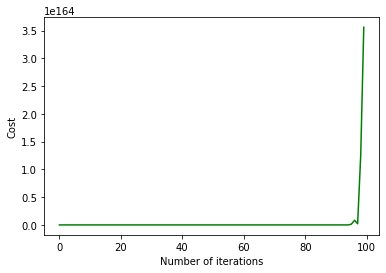

In [66]:
plt.plot(range(100), SGD_cost_list1, c='green')
#plt.title("SGD_results")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

In [62]:
w_bgd=np.ones([Xnew.shape[1], 1])
BGD_cost_list1 , w_bgd = calculate_mini_batch_grad(Xnew , Y , w_bgd , 0.9 , 100 , 16)
len(BGD_cost_list)

3600

Text(0, 0.5, 'Cost')

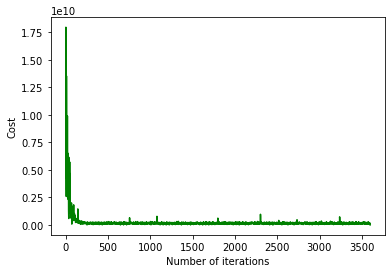

In [63]:
plt.plot(range(3600), BGD_cost_list1, c='green')
#plt.title("SGD_results")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

alpha = 1e-8 , smaller alpha 

In [69]:
w=np.ones([Xnew.shape[1], 1])
GD_cost_list3 , w = batch_gradiant(Xnew , Y , w , 1e-8, 100)

In [79]:
w=np.ones([Xnew.shape[1], 1])
SGD_cost_list3 , w = calculate_SGD(Xnew , Y , w , 1e-8 , 100)

In [73]:
w_bgd=np.ones([Xnew.shape[1], 1])
BGD_cost_list3 , w_bgd = calculate_mini_batch_grad(Xnew , Y , w_bgd , 1e-8 , 100 , 16)

Text(0, 0.5, 'Cost')

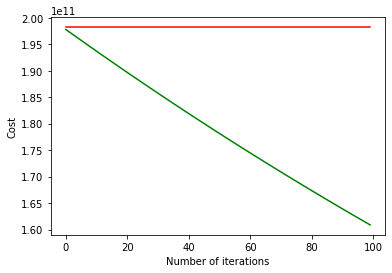

In [80]:
#alpha = 1e-8
plt.plot(range(100), GD_cost_list3, c='red') 

#alpha = 0.001
plt.plot(range(100), cost_list, c='green')

plt.xlabel("Number of iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

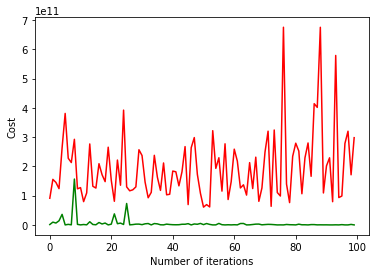

In [81]:
#alpha=0.001
plt.plot(range(100), SGD_cost_list, c='green')

#alpha = 1e-8
plt.plot(range(100), SGD_cost_list3, c='red')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

Text(0, 0.5, 'Cost')

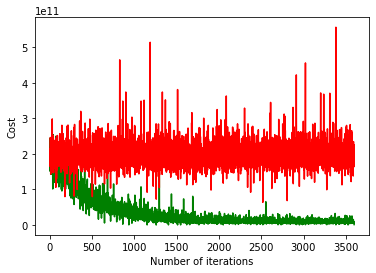

In [82]:
plt.plot(range(3600), BGD_cost_list, c='green')
plt.plot(range(3600), BGD_cost_list3, c='red')

plt.xlabel("Number of iterations")
plt.ylabel("Cost")

q1_part_F

In [110]:
from sklearn.linear_model import LinearRegression as LinearRegression1
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [111]:
X = houses.drop(columns=['price']).to_numpy()
Y = houses['price'].to_numpy().reshape(-1, 1)

X_norm = min_max_norm(X , Y)
X_bias = np.ones((X.shape[0],1))
X_new = np.hstack((X_norm,X_bias))
X_new

array([[4.58024691e-01, 2.46913580e-04, 1.23456790e-04, ...,
        0.00000000e+00, 1.23456790e-04, 1.00000000e+00],
       [5.53086420e-01, 2.46913580e-04, 2.46913580e-04, ...,
        0.00000000e+00, 1.85185185e-04, 1.00000000e+00],
       [6.14814815e-01, 1.85185185e-04, 1.23456790e-04, ...,
        6.17283951e-05, 1.23456790e-04, 1.00000000e+00],
       ...,
       [2.23456790e-01, 1.23456790e-04, 6.17283951e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.79629630e-01, 1.85185185e-04, 6.17283951e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.37654321e-01, 1.85185185e-04, 6.17283951e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [114]:
reg = LinearRegression2()
reg.fit(X_new, Y)

y_pred = reg.predict(X_new)

print(f"weights(sklearn): {reg.coef_}")
print(f"Mean squared error(sklearn): {mean_squared_error(Y, y_pred)}")

weights(sklearn): [[1.17834545e+06 2.37669076e+07 3.24534505e+07 1.27962907e+08
  2.04126567e+08 7.75708091e+07 4.21075114e+08 1.33125005e+08
  0.00000000e+00]]
Mean squared error(sklearn): 32164897.032794468


In [113]:
MyModel_MSE = calculate_cost_func(Xnew , Y , updated_w)
print(MyModel_MSE)

160878446204.26193
